# Simulation Problem 8
## ML HW_4

#### import libraries, load dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("../data/Ted/ted_main.csv")
X = data['duration'].to_numpy()
del data

#### parzen Window Etimation

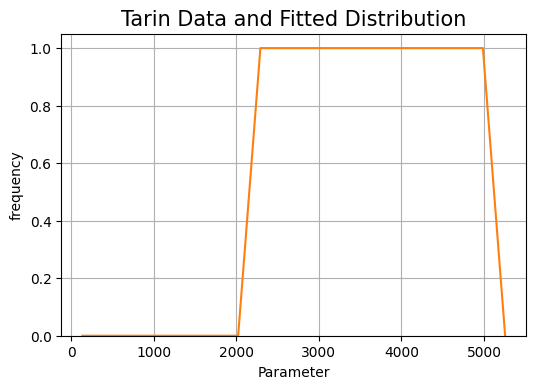

[1. 0. 0. 1.]


In [56]:
class parzen:
    def __init__(self, x, h):
        self.h = h
        self.x = x
        self.n = x.shape[0]
        pass

    def kernel(self, x, unit_len = 1):
        return np.ones(x.shape[0]) - np.max(np.array(np.abs(x) < 0.5 * unit_len * np.ones(x.shape), dtype=np.int16), axis=1)

    def prob(self, x):
        probs = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            probs[i] = np.sum(self.kernel((np.tile(x[i],(self.n,1)) - self.x) / self.h)) / self.n
        return probs

    def plot_dist(self):
        fig, ax = plt.subplots()
        fig.set_dpi(100)
        range = np.linspace(np.min(self.x),np.max(self.x), 20)
        ax.hist(self.x, 20, density=True, facecolor='g', alpha=0.5)
        ax.plot(range, self.prob(range))
        ax.set_xlabel("Parameter")
        ax.set_ylabel("frequency")
        ax.set_title("Tarin Data and Fitted Distribution", fontsize=15)
        plt.grid(True)
        plt.show()

estimator = parzen(X, h = 10)
estimator.plot_dist()